# Análisis Exploratorio de Datos

## Objetivo

Obtener una comprensión profunda de los datos antes de aplicarles modelos de machine learning más complejos.

## Requisitos para poder cargar el Dataframe

Tienes que descargar el Instalador de Herramientas de Compilación:
* Ve a la página oficial de descargas de Visual Studio: https://visualstudio.microsoft.com/es/downloads/
* Busca la sección "Herramientas para Visual Studio" (suele estar más abajo en la página).
* Haz clic en el botón de descarga para "Build Tools for Visual Studio". Se descargará un archivo llamado vs_BuildTools.exe o similar.

Ejecutar la Instalación:

* Abre el archivo que acabas de descargar. El instalador se preparará y luego te mostrará una ventana con "Cargas de trabajo".
* Marca la casilla que dice "Desarrollo para el escritorio con C++". Esto seleccionará automáticamente todo lo necesario (incluyendo CMake y el compilador de C++ que phik necesita).
* Haz clic en el botón "Instalar" abajo a la derecha. La descarga e instalación puede tardar un buen rato (varios minutos hasta más de media hora, dependiendo de tu conexión) y ocupará algunos gigabytes en tu disco.

Reiniciar y Volver a Intentar:

* Una vez que la instalación termine, reinicia tu computadora. Este paso es muy importante para que el sistema reconozca las nuevas herramientas.
* Abre una nueva terminal (CMD, PowerShell o la terminal de VS Code).
* Activa tu entorno virtual de nuevo (si no está activo).
* Ahora sí, ejecuta el comando de instalación original:

pip install ydata-profiling

Debes instalar instalar el MOTOR (engines)  pyarrow, permite leer y escribir formatos de archivos rápidos como Parquet
que son más eficientes que los CSV. Es el motor que hace el manejo de grandes volumenes de datos en Pyhton sea mucho más 
rápido 

pandas

Provee la función read_parquet.

pip install pyarrow

Instala estas librerias:Te permiten cargar datasets directamente desde la plataforma  Hugging Face en internet sin necesidad
de descargarlos manualmente

huggingface_hub : Se conecta al al repositorio de Hugging Face  para localizar el dataset que pides:
fsspec : Permite que librerías como Pandas lean esos archivos remotos como si estuvieran en tu computadora 
(ucberkeley-dlab/measuring-hate-speech) y gestionar la descarga del archivo.

fsspec (Filesystem Spec): Esta librería actúa como un intermediario. Permite que pandas trate una ubicación remota 
(como un dataset en Hugging Face) de la misma manera que trataría un archivo en tu disco duro. huggingface-hub se
 integra con fsspec para que el protocolo hf:// funcione

pip install fsspec huggingface_hub

## Y por ultimo

Hacer un : pip freeze > requirements.txt


In [38]:
#  Impotar el modulo sys de Pyhton, te da acceso a variables y funciones que interactúan directamente con el sistema 
#  Una de las variables más utiles que provee es sys.executable. 

import sys
# Instala la libreria : ydata-profiling en el entorno de Python correcto, garantizando que sea el mismo que este usando tu notebook.

!{sys.executable} -m pip install ydata-profiling

In [39]:
#1. Importar librerias para manipulacion y análisis de datos
import pandas as pd
import numpy as np

#2. Librerias para visualizacion de datos 
import matplotlib.pyplot as plt
import seaborn as sns

#3. Importa la clase: ProfileReport que es la herramienta principal de la libreria ydata-profiling 
#   para generar un reporte de análisis exploratorio de datos 
from ydata_profiling import ProfileReport

#   Configuraciones adicionales para mejorar la visualizacion
#   Hace que los graficos de Seaborn se vean un poco más bonitos 
sns.set_theme(style="whitegrid")

#   Asegura que los graficos de Matplotlib se muestren en el notebook
%matplotlib inline

In [40]:

df = pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")

In [41]:
# 1. Ver las dimensiones del dataframe (filas, columnas)
df.shape
print(f"Este dataframe tiene {df.shape[0]} filas  y {df.shape[1]} columnas ")

Este dataframe tiene 135556 filas  y 131 columnas 


In [42]:
# 2. Obtener un resumen técnico : nombre de columnas, conteo
print(f"Resumen técnico del dataframe\n")
df.info()

Resumen técnico del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Columns: 131 entries, comment_id to annotator_sexuality_other
dtypes: bool(103), float64(19), int32(2), int8(1), object(6)
memory usage: 40.3+ MB


In [43]:
# 3. Visualizar  las primeras 5 filas para entender la estructura 
print("Primeras 5 filas del dataframe")
display(df.head())

Primeras 5 filas del dataframe


,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [44]:
print("\nEstadisticas descriptivas (columnas númericas)")
display(df.describe())


Estadisticas descriptivas (columnas númericas)


,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [45]:
# 1. Contar los valores nulos por columna
print("Los valores nulos por columna:")
print(df.isnull().sum())

Los valores nulos por columna:
comment_id                      0
annotator_id                    0
platform                        0
sentiment                       0
respect                         0
                               ..
annotator_religion_other        0
annotator_sexuality_bisexual    0
annotator_sexuality_gay         0
annotator_sexuality_straight    0
annotator_sexuality_other       0
Length: 131, dtype: int64


In [46]:
# Si hubiera valores nulos , decidiriamos como manejarlos (eliminacion, rellenarlos, etc)
# Ejemplo: df.dropna(inplace=True) o df['columna'].fillna(valor, inplace=True)

# Contar filas duplicadas
filas_duplicadas = df.duplicated().sum()
print(f"Número de filas duplicadas: {filas_duplicadas}")

# Si hubieran FILAS DUPLICADAS las ELIMINARIAMOS 
if filas_duplicadas > 0:
    df.drop_duplicates(inplace=True)
    print("Filas duplicadas eliminadas.")

Número de filas duplicadas: 0


Distribución de comentarios por plataforma:
platform
1    43227
0    37164
2    35027
3    20138
Name: count, dtype: int64
Numero de Comentarios


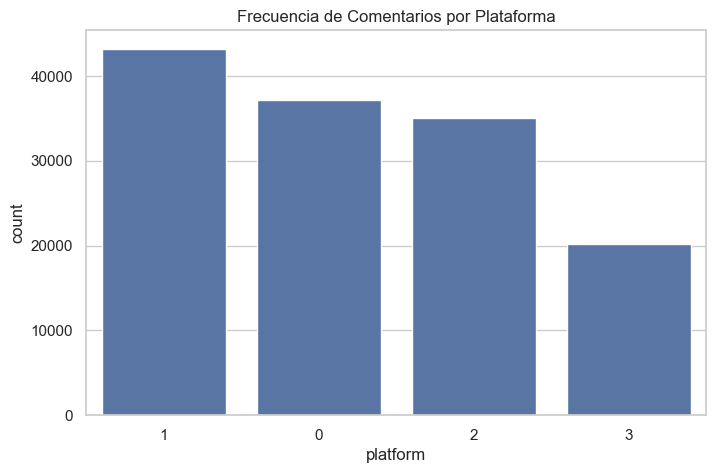

Distribución del sentimiento de los comentarios:
sentiment
4.0    61435
3.0    35243
2.0    19785
0.0     9658
1.0     9435
Name: count, dtype: int64


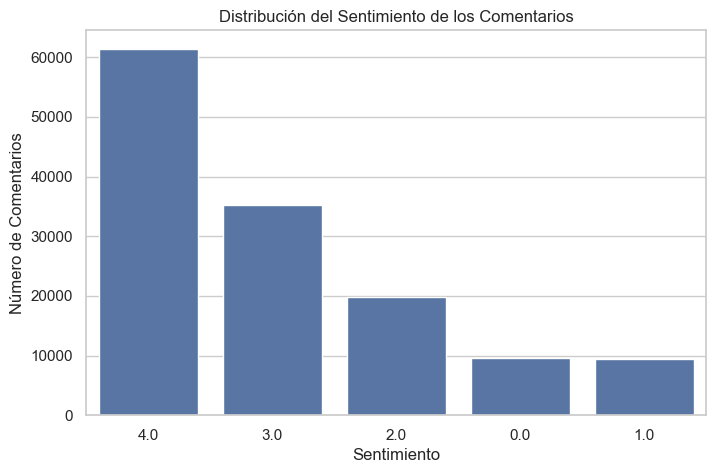

In [47]:
# PASO 3 : Análisis Univariado
print("Distribución de comentarios por plataforma:")
print(df['platform'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.title('Frecuencia de Comentarios por Plataforma')
print('Numero de Comentarios')
plt.show()

# Analicemos la columna 'sentiment'
print("Distribución del sentimiento de los comentarios:")
print(df['sentiment'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
plt.title('Distribución del Sentimiento de los Comentarios')
plt.ylabel('Número de Comentarios')
plt.xlabel('Sentimiento')
plt.show()


Estadísticas descriptivas para 'hate_speech_score':
count    135556.000000
mean         -0.567428
std           2.380003
min          -8.340000
25%          -2.330000
50%          -0.340000
75%           1.410000
max           6.300000
Name: hate_speech_score, dtype: float64


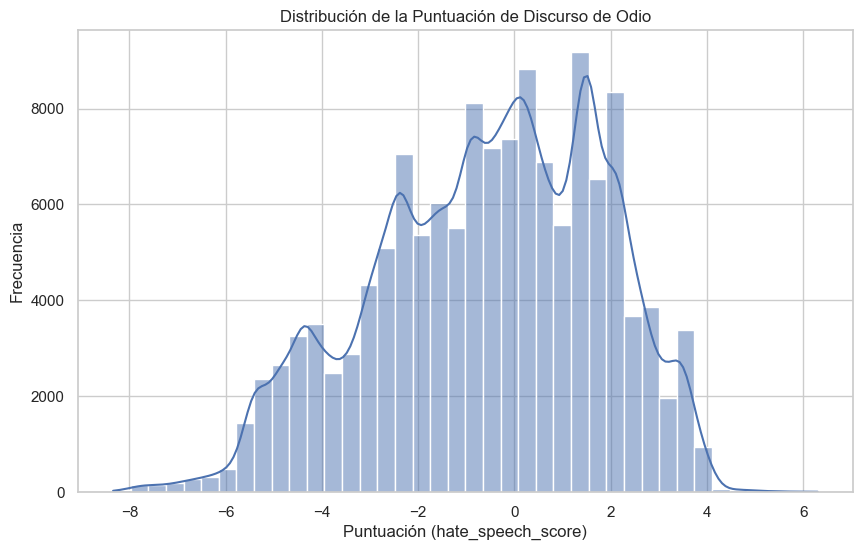

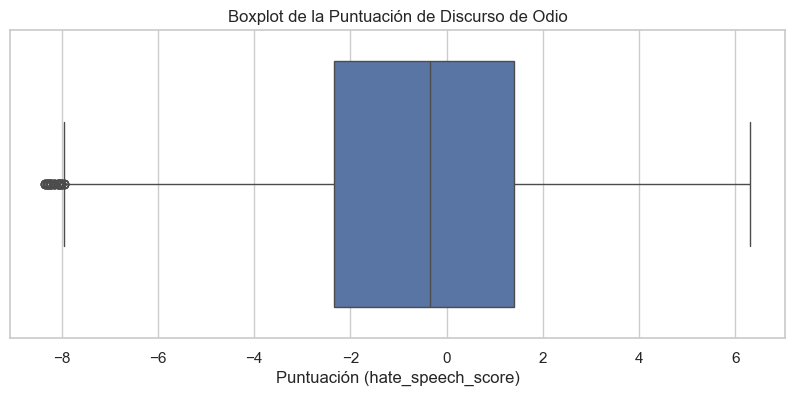

In [48]:
# Análisis de Variables Numéricas(float, int)
# Analicemos la columna más importante: 'hate_speech_score'
print("Estadísticas descriptivas para 'hate_speech_score':")
print(df['hate_speech_score'].describe())

# Visualicemos su distribución con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['hate_speech_score'], kde=True, bins=40)
plt.title('Distribución de la Puntuación de Discurso de Odio')
plt.xlabel('Puntuación (hate_speech_score)')
plt.ylabel('Frecuencia')
plt.show()

# Usemos un boxplot para identificar outliers claramente
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['hate_speech_score'])
plt.title('Boxplot de la Puntuación de Discurso de Odio')
plt.xlabel('Puntuación (hate_speech_score)')
plt.show()


Distribución de la variable 'hatespeech':
hatespeech
0.0    0.594765
2.0    0.339498
1.0    0.065737
Name: proportion, dtype: float64


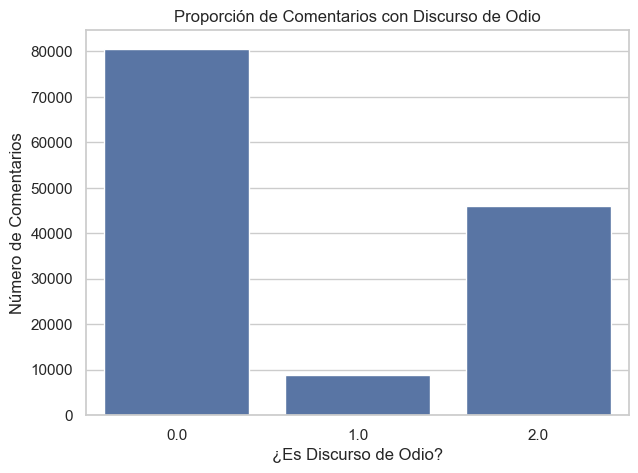

In [49]:
# Analisis de variables Booleanas(bool)

# Analicemos una columna booleana clave, por ejemplo, 'hatespeech'
# (Asumo que existe una columna con este nombre o similar)
# Reemplaza 'hatespeech' con el nombre correcto si es diferente.

# Verificamos si la columna existe antes de usarla
if 'hatespeech' in df.columns:
    print("Distribución de la variable 'hatespeech':")
    # Usamos normalize=True para ver los porcentajes
    print(df['hatespeech'].value_counts(normalize=True))

    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x='hatespeech')
    plt.title('Proporción de Comentarios con Discurso de Odio')
    plt.ylabel('Número de Comentarios')
    plt.xlabel('¿Es Discurso de Odio?')
    plt.show()
else:
    print("La columna 'hatespeech' no se encontró. Por favor, revisa el nombre exacto.")
    # Podríamos analizar otra columna booleana relevante, como 'target_person'
    if 'target_person' in df.columns:
        print("\nDistribución de la variable 'target_person':")
        print(df['target_person'].value_counts(normalize=True))
        
        plt.figure(figsize=(7, 5))
        sns.countplot(data=df, x='target_person')
        plt.title('Proporción de Comentarios dirigidos a una Persona')
        plt.ylabel('Número de Comentarios')
        plt.xlabel('¿Objetivo es una Persona?')
        plt.show()



###  Interpretación Profesional:

value_counts(normalize=True) es la herramienta más importante aquí. Nos da el porcentaje de True vs. False. Si vemos un resultado como False: 0.95, True: 0.05, sabemos inmediatamente que tenemos un dataset muy desbalanceado.
El gráfico de barras confirma visualmente este desbalance. Un desbalance extremo es uno de los hallazgos más importantes de un EDA en un problema de clasificación como este.
Este enfoque estructurado te permite extraer los insights más importantes de cada tipo de variable de manera eficiente, sentando una base sólida para los siguientes pasos de tu análisis.